In [64]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict

In [65]:
class BatsmanState(TypedDict):
    runs : int
    balls: int
    fours : int 
    sixes: int 

    sr : float 
    bpb : float 
    boundary_percent: float 
    summary : str

In [66]:
def calculate_sr(state:BatsmanState)-> BatsmanState:
    runs = state['runs']
    balls = state['balls']

    answer = (runs/balls) * 100 

    return {'sr':answer}

In [67]:
def calculate_bpb(state:BatsmanState)-> BatsmanState:
    boundaries = state['fours'] + state['sixes']
    bpb= state['balls'] / boundaries

    return {'bpb':bpb}

In [68]:
def calc_boundary_percent(state:BatsmanState)-> BatsmanState:
    boundary_runs = state['fours'] *4 + state['sixes']*6
    boundary_percent= (boundary_runs/state['runs'])*100 

    return {'boundary_percent':boundary_percent}

In [69]:
def summary (state:BatsmanState):
    summary = f"""
strike rate - {state['sr']} \n
Balls per boundary - {state["bpb"]} \n
boundary percent - {state["boundary_percent"]}
"""

    return {'summary':summary}

In [70]:
#create graph 
graph = StateGraph(BatsmanState)

# add nodes 
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node("calc_boundary_percent",calc_boundary_percent)
graph.add_node('summary', summary)
# add edges 
graph.add_edge(START,'calculate_sr' )
graph.add_edge(START,'calculate_bpb' )
graph.add_edge(START,'calc_boundary_percent')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calc_boundary_percent', 'summary')

graph.add_edge('summary',END)



# execute graph 
workflow = graph.compile()

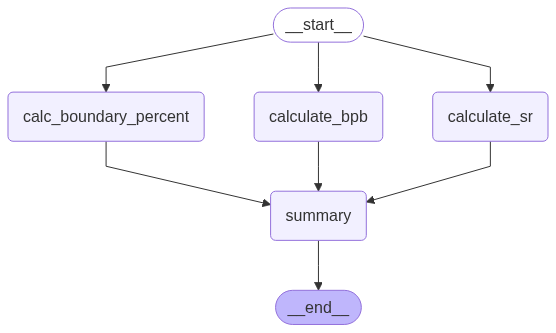

In [71]:
workflow

In [72]:
initial_state = {
    'runs': 100,
    'balls':50,
    'fours':6,
    'sixes':4
    }

final_state = workflow.invoke(initial_state)

final_state


{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\nstrike rate - 200.0 \n\nBalls per boundary - 5.0 \n\nboundary percent - 48.0\n'}